In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit

In [14]:
# 1. 读入数据
data = np.loadtxt('../uspop.txt')
x = data[:, 0]  # 年份
y = data[:, 1]  # 人口数
print(x)
print(y)

[1990. 1980. 1970. 1960. 1950. 1940. 1930. 1920. 1910. 1900. 1890. 1880.
 1870. 1860. 1850. 1840. 1830. 1820. 1810. 1800. 1790.]
[2.48709873e+08 2.26545805e+08 2.03211926e+08 1.79323175e+08
 1.50697361e+08 1.31669275e+08 1.22775046e+08 1.05710620e+08
 9.19722660e+07 7.59945750e+07 6.29477140e+07 5.01557830e+07
 3.85583710e+07 3.14433210e+07 2.31918760e+07 1.70633530e+07
 1.28607020e+07 9.63845300e+06 7.23988100e+06 5.30848300e+06
 3.92921400e+06]


In [15]:
# 2. 线性拟合
slope, intercept, _, _, _ = linregress(x, y)
linear_fit = slope * x + intercept

In [16]:
# # 3. 指数拟合

# def exponential_func(x, a, c):
#     return a * np.exp(c * x)

# # Provide initial guesses for parameters
# initial_guess = (1e6, 0.02)  # Adjust these values based on your data

# params, _ = curve_fit(exponential_func, x, y, p0=initial_guess)
# exponential_fit = exponential_func(x, *params)
# 3. 用 scipy.optimize.curve_fit 函数拟合人口数随年份变化的曲线，并将拟合结果及原始数据画在同一张图中。

def exponential_fit(x, a, c):
    return a * np.expm1(c * x)

# 归一化数据
x_normalized = x / 1000.0  # 选择适当的归一化因子
y_normalized = y / 1e6    # 选择适当的归一化因子

# 用归一化后的数据进行拟合
popt_normalized, pcov_normalized = curve_fit(exponential_fit, x_normalized, y_normalized)

# 反归一化拟合结果
a_normalized, c_normalized = popt_normalized
a = a_normalized * 1e6  # 反归一化因子
c = c_normalized / 1000.0  # 反归一化因子

# 计算拟合值
exponential_fit_values = exponential_fit(x, a, c)


In [17]:
# 4. 公式变换重新进行线性拟合
# 将 y = ae^(cx) 转换为 ln(y) = ln(a) + cx
log_y = np.log(y)
slope_log, intercept_log, r_value_log, p_value_log, std_err_log = linregress(x, log_y)
exponential_fit_linear_transform = np.exp(intercept_log) * np.exp(slope_log * x)

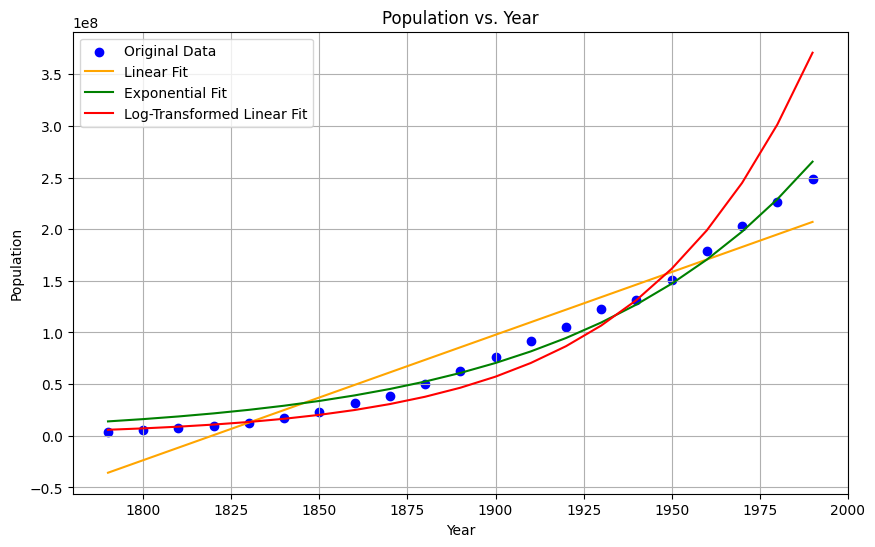

In [18]:
# 绘图
plt.figure(figsize=(10, 6))

# 原始数据
plt.scatter(x, y, label='Original Data', color='blue')

# 线性拟合
plt.plot(x, linear_fit, label='Linear Fit', color='orange')

# 指数拟合
plt.plot(x, exponential_fit_values, label='Exponential Fit', color='green')

# 公式变换后的线性拟合
plt.plot(x, exponential_fit_linear_transform, label='Log-Transformed Linear Fit', color='red')

# 图形设置
plt.title('Population vs. Year')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()